# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'units' : 'metric',
    'appid' : weather_api_key    
}

responses =[]
cityCount = 0
print("Initiating request to weather API for the cities")
print('-'*40)

for city in cities:
    cityCount = cityCount + 1
    print(f"Aquiring data for the city({cityCount}), {city}")
    params['q'] = city
    
    try:        
        response = requests.get(url, params=params).json()
        if (response['cod'] == 200):
            responses.append(response)
        else:
            print(f"City not found, {city}. Skipping...")            
    except:
        print(f"Failed to aquire data for the city, {city}. Skipping...")    
    

len(responses)

Initiating request to weather API for the cities
----------------------------------------
Aquiring data for the city(1), punta arenas
Aquiring data for the city(2), illoqqortoormiut
City not found, illoqqortoormiut. Skipping...
Aquiring data for the city(3), hasaki
Aquiring data for the city(4), shirokiy
Aquiring data for the city(5), puerto escondido
Aquiring data for the city(6), nikolskoye
Aquiring data for the city(7), visby
Aquiring data for the city(8), pevek
Aquiring data for the city(9), upernavik
Aquiring data for the city(10), piacabucu
Aquiring data for the city(11), esperance
Aquiring data for the city(12), pokhara
Aquiring data for the city(13), ust-bolsheretsk
City not found, ust-bolsheretsk. Skipping...
Aquiring data for the city(14), camana
Aquiring data for the city(15), mar del plata
Aquiring data for the city(16), nizhneyansk
City not found, nizhneyansk. Skipping...
Aquiring data for the city(17), fortuna
Aquiring data for the city(18), ushuaia
Aquiring data for the 

Aquiring data for the city(180), barzas
Aquiring data for the city(181), kathmandu
Aquiring data for the city(182), santo antonio do amparo
Aquiring data for the city(183), kaitangata
Aquiring data for the city(184), garissa
Aquiring data for the city(185), pisco
Aquiring data for the city(186), chuy
Aquiring data for the city(187), tautira
Aquiring data for the city(188), inhambane
Aquiring data for the city(189), khatanga
Aquiring data for the city(190), kudahuvadhoo
Aquiring data for the city(191), okha
Aquiring data for the city(192), paamiut
Aquiring data for the city(193), beringovskiy
Aquiring data for the city(194), buraydah
Aquiring data for the city(195), marawi
Aquiring data for the city(196), abu zabad
Aquiring data for the city(197), xiaoyi
Aquiring data for the city(198), guerrero negro
Aquiring data for the city(199), sibu
Aquiring data for the city(200), port-gentil
Aquiring data for the city(201), castro
Aquiring data for the city(202), arenapolis
Aquiring data for the

Aquiring data for the city(363), aswan
Aquiring data for the city(364), nesbyen
Aquiring data for the city(365), pangai
Aquiring data for the city(366), lucapa
Aquiring data for the city(367), abalak
Aquiring data for the city(368), marystown
Aquiring data for the city(369), taitung
Aquiring data for the city(370), mlonggo
Aquiring data for the city(371), jackson
Aquiring data for the city(372), coahuayana
Aquiring data for the city(373), iroquois falls
Aquiring data for the city(374), lazaro cardenas
Aquiring data for the city(375), nome
Aquiring data for the city(376), cuamba
Aquiring data for the city(377), gardan diwal
City not found, gardan diwal. Skipping...
Aquiring data for the city(378), mastic beach
Aquiring data for the city(379), chapleau
Aquiring data for the city(380), aklavik
Aquiring data for the city(381), roblin
Aquiring data for the city(382), esna
Aquiring data for the city(383), arona
Aquiring data for the city(384), atikokan
Aquiring data for the city(385), cabra


Aquiring data for the city(543), mishan
Aquiring data for the city(544), karaton
Aquiring data for the city(545), wake forest
Aquiring data for the city(546), odoyev
Aquiring data for the city(547), saleaula
City not found, saleaula. Skipping...
Aquiring data for the city(548), juifang
City not found, juifang. Skipping...
Aquiring data for the city(549), pihuamo
Aquiring data for the city(550), moose factory
Aquiring data for the city(551), bitung
Aquiring data for the city(552), plouzane
Aquiring data for the city(553), xining
Aquiring data for the city(554), cozumel
Aquiring data for the city(555), niimi
Aquiring data for the city(556), yakeshi
Aquiring data for the city(557), ouesso
Aquiring data for the city(558), rawson
Aquiring data for the city(559), hit
Aquiring data for the city(560), estelle
Aquiring data for the city(561), englewood
Aquiring data for the city(562), kudat
Aquiring data for the city(563), vila do maio
Aquiring data for the city(564), mayumba
Aquiring data for 

563

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#create an empty dataframe with required columns
weatherDF = pd.DataFrame(columns=['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

#define list for storing multiple values
lat = []
lng = []
maxtemp = []
humidity = []
clouds = []
windspeed = []
country = []
dates = []
city = []

for res in responses:
    try:
        city.append(res['name'])
        lat.append(res['coord']['lat'])
        lng.append(res['coord']['lon'])
        maxtemp.append(res['main']['temp_max'])
        humidity.append(res['main']['humidity'])
        clouds.append(res['clouds']['all'])
        windspeed.append(res['wind']['speed'])
        country.append(res['sys']['country'])
        dates.append(res['dt'])
    except:
        print("Error")
        print(res)
        break

#populate the dataframe
weatherDF['City'] = city
weatherDF['Latitude'] = lat
weatherDF['Longitude'] = lng
weatherDF['Max Temperature'] = maxtemp
weatherDF['Humidity'] = humidity
weatherDF['Cloudiness'] = clouds
weatherDF['Wind Speed'] = windspeed
weatherDF['Country'] = country
weatherDF['Date'] = dates

weatherDF.to_csv(output_data_file)
weatherDF

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,4.06,75,0,4.63,CL,1624066728
1,Hasaki,35.7333,140.8333,21.27,84,100,4.81,JP,1624066831
2,Shirokiy,49.7580,129.5230,19.40,70,95,8.49,RU,1624066846
3,Puerto Escondido,15.8500,-97.0667,26.46,57,90,0.00,MX,1624066846
4,Nikolskoye,59.7035,30.7861,17.94,80,0,2.29,RU,1624066805
...,...,...,...,...,...,...,...,...,...
558,Lingao,19.9103,109.6859,32.70,56,12,6.42,CN,1624066981
559,Sonthofen,47.5167,10.2833,20.21,87,87,0.45,DE,1624066981
560,Dwārāhāt,29.7833,79.4333,17.71,98,100,0.99,IN,1624066981
561,Kenai,60.5544,-151.2583,18.05,52,90,5.14,US,1624066747


In [14]:
weatherDF.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.072875,20.274201,20.048810,69.518650,54.424512,3.289663,1.624067e+09
std,33.028628,90.341357,8.016148,21.308134,40.671051,2.220976,9.390911e+01
min,-54.800000,-179.166700,-4.030000,1.000000,0.000000,0.000000,1.624066e+09
25%,-6.685400,-58.103850,14.430000,58.000000,8.000000,1.540000,1.624067e+09
50%,25.286700,26.891000,21.070000,75.000000,67.000000,2.900000,1.624067e+09
75%,47.878600,100.344850,26.270000,85.500000,98.000000,4.630000,1.624067e+09
max,78.218600,179.316700,44.090000,100.000000,100.000000,11.540000,1.624067e+09


In [28]:
#Get the date
dateinDF = int(weatherDF.loc[1, "Date"])
analysisDate = datetime.utcfromtimestamp(dateinDF).strftime('%Y-%m-%d')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

There are no cities with humidity over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

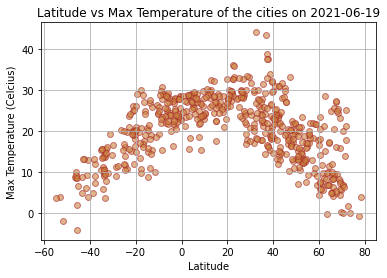

In [30]:
weatherDF.plot.scatter(x='Latitude', y='Max Temperature', alpha=0.6, c='peru', edgecolor='brown',s=35)
plt.title(f"Latitude vs Max Temperature of the cities on {analysisDate}")
plt.ylabel('Max Temperature (Celcius)')
plt.grid()
plt.savefig("Output/LatvsMaxTemp.png",facecolor='w', edgecolor='w')
plt.show()

## Latitude vs. Humidity Plot

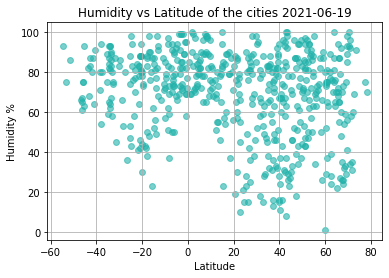

In [31]:
weatherDF.plot.scatter(x='Latitude', y='Humidity',alpha=0.6, c='lightseagreen',  s=35)
plt.title(f'Humidity vs Latitude of the cities {analysisDate}')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("Output/LatvsHumidity.png",facecolor='w', edgecolor='w')
plt.show()

## Latitude vs. Cloudiness Plot

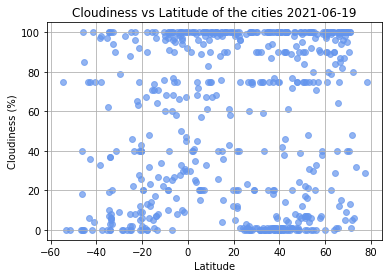

In [32]:
weatherDF.plot.scatter(x='Latitude', y='Cloudiness',alpha=0.7, c='cornflowerblue', s=35)
plt.title(f'Cloudiness vs Latitude of the cities {analysisDate}')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Output/LatvsClouds.png", facecolor='w', edgecolor='w')
plt.show()


## Latitude vs. Wind Speed Plot

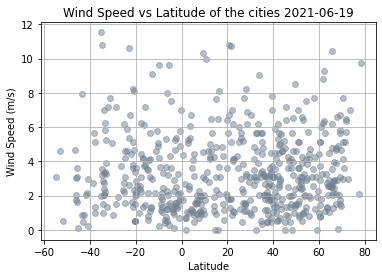

In [33]:
weatherDF.plot.scatter(x='Latitude', y='Wind Speed',alpha=0.5, c='slategrey', s=35)
plt.title(f'Wind Speed vs Latitude of the cities {analysisDate}')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig("Output/LatvsWindSpeed.png",facecolor='w', edgecolor='w')
plt.show()

## Linear Regression

In [34]:
#Get dataframes for nothern and southern hemispheres
northData = weatherDF.loc[weatherDF['Latitude'] >= 0]
southData = weatherDF.loc[weatherDF['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is  -0.66
The line equation is  y = -0.27x + 31.29


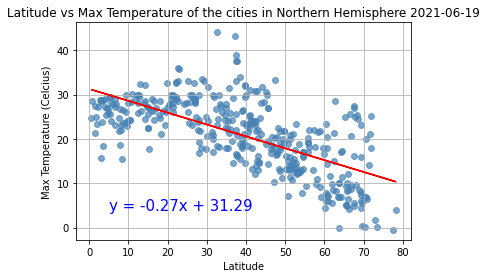

In [35]:
x = northData['Latitude']
y= northData['Max Temperature']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,4),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.7, c='steelblue',s=35)
plt.title(f'Latitude vs Max Temperature of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celcius)')
plt.grid()
plt.savefig("Output/LatvsMaxtemp_NH.png",facecolor='w', edgecolor='w')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is  0.81
The line equation is  y = 0.44x + 27.1


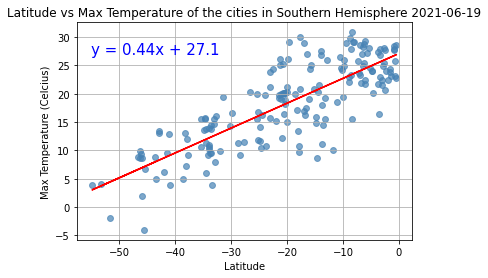

In [36]:
x = southData['Latitude']
y= southData['Max Temperature']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.7, c='steelblue',s=35)
plt.title(f'Latitude vs Max Temperature of the cities in Southern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celcius)')
plt.grid()
plt.savefig("Output/LatvsMaxtemp_SH.png",facecolor='w', edgecolor='w')
plt.show()

#### Observation: Latitude Vs Max Temperature

From the above two plots, it can be observed that as the latitude increases above 0 in the northern hemisphere the max temperature values fall steadily. Similarly, when the latitude decreases below 0 in the southern hemisphere the max temperature values fall. 
This shows that the temperatures around equator are hottest and get colder as we move towards north/south.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is  -0.15
The line equation is  y = -0.17x + 73.59


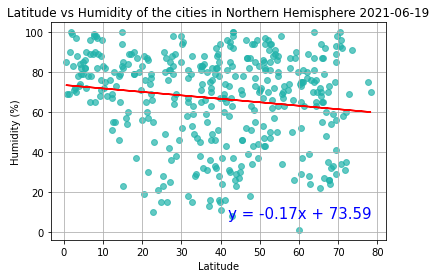

In [37]:
x = northData['Latitude']
y= northData['Humidity']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(42,7),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.7, c='lightseagreen',s=35)
plt.title(f'Latitude vs Humidity of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Output/LatvsHumidity_NH.png",facecolor='w', edgecolor='w')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is  0.04
The line equation is  y = 0.05x + 76.14


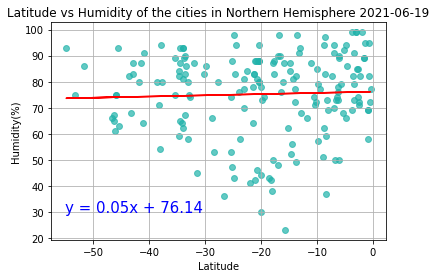

In [38]:
x = southData['Latitude']
y= southData['Humidity']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.7, c='lightseagreen',s=35)
plt.title(f'Latitude vs Humidity of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("Output/LatvsHumidity_SH.png",facecolor='w', edgecolor='w')
plt.show()

#### Observation: Latitude vs Humidity

No relationship can be observed with latitudes and humidity values across nothern and southern hemispheres. The coorelation values are closer to 0. The humidity is not dependent on latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is  -0.01
The line equation is  y = -0.01x + 58.03


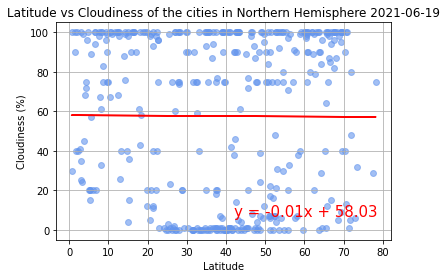

In [39]:
x = northData['Latitude']
y= northData['Cloudiness']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(42,7),fontsize=15,color="red")

plt.scatter(x, y, alpha=0.6, c='cornflowerblue',s=35)
plt.title(f'Latitude vs Cloudiness of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Output/LatvsCloudiness_NH.png",facecolor='w', edgecolor='w')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is  0.27
The line equation is  y = 0.76x + 62.82


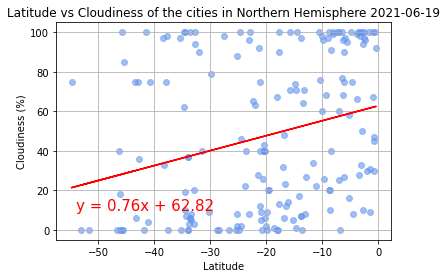

In [40]:
x = southData['Latitude']
y= southData['Cloudiness']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-54,10),fontsize=15,color="red")

plt.scatter(x, y, alpha=0.6, c='cornflowerblue',s=35)
plt.title(f'Latitude vs Cloudiness of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Output/LatvsCloudiness_SH.png",facecolor='w', edgecolor='w')
plt.show()

#### Observation: Latitude vs Cloudiness 

No relationship can be observed with cloudiness and the latitudes across nothern and southern hemispheres. The r-values are close to 0. The percentage of clouds in an area is independent of latitudes.

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-value is  0.09
The line equation is  y = 0.01x + 2.9


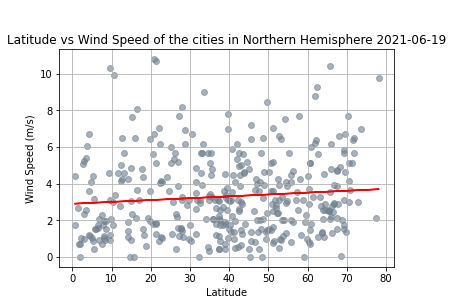

In [41]:
x = northData['Latitude']
y= northData['Wind Speed']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(4,13),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.6, c='slategrey',s=35)
plt.title(f'Latitude vs Wind Speed of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig("Output/LatvsWindSpeed_NH.png",facecolor='w', edgecolor='w')
plt.show()

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-value is  -0.06
The line equation is  y = -0.01x + 3.06


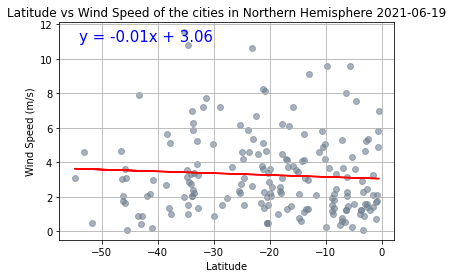

In [42]:
x = southData['Latitude']
y= southData['Wind Speed']

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is ",round(rvalue,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-54,11),fontsize=15,color="blue")

plt.scatter(x, y, alpha=0.6, c='slategrey',s=35)
plt.title(f'Latitude vs Wind Speed of the cities in Northern Hemisphere {analysisDate}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig("Output/LatvsWindSpeed_SH.png",facecolor='w', edgecolor='w')
plt.show()


#### Observation: Latitude vd Wind Speed 

There is no strong relationship with latitude and wind speed. The coorelation values are closer to 0. 